# Prueba Analista Financiero SURA

## Punto 1

### Parte 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Cargue de datos, descargados desde Yahoo Finance
#usdcop = pd.read_csv("USDCOP.csv",index_col='Date')
usdcop = pd.read_csv("USDCOP.csv",usecols=['Date','Close'])
oil = pd.read_csv("CL_F.csv",usecols=['Date','Close'])



In [7]:
usdcop.head()

,Date,Close
0,2008-01-01,1999.099976
1,2008-01-02,1979.099976
2,2008-01-03,1986.800049
3,2008-01-04,1972.099976
4,2008-01-07,1976.300049


In [8]:
oil.head()

,Date,Close
0,2008-01-02,99.620003
1,2008-01-03,99.180000
2,2008-01-04,97.910004
3,2008-01-06,NaN
4,2008-01-07,95.089996


In [9]:
usdcop.dtypes

Date      object
Close    float64
dtype: object

In [10]:
usdcop['Date'] = pd.to_datetime(usdcop['Date'])
oil['Date'] = pd.to_datetime(oil['Date'])
usdcop.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [11]:
index_date_u = usdcop['Date']
index_date_o = oil['Date']
usdcop.set_index(index_date_u, inplace=True)
oil.set_index(index_date_o, inplace=True)
usdcop.rename(columns = {'Date':'Fecha'}, inplace = True) 
oil.rename(columns = {'Date':'Fecha'}, inplace = True) 

In [12]:
usdcop['year'] = pd.DatetimeIndex(usdcop['Fecha']).year
usdcop['mes'] = pd.DatetimeIndex(usdcop['Fecha']).month
usdcop['dia'] = pd.DatetimeIndex(usdcop['Fecha']).day
oil['year'] = pd.DatetimeIndex(oil['Fecha']).year
oil['mes'] = pd.DatetimeIndex(oil['Fecha']).month
oil['dia'] = pd.DatetimeIndex(oil['Fecha']).day
usdcop.head()

,Fecha,Close,year,mes,dia
Date,,,,,
2008-01-01,2008-01-01,1999.099976,2008,1,1
2008-01-02,2008-01-02,1979.099976,2008,1,2
2008-01-03,2008-01-03,1986.800049,2008,1,3
2008-01-04,2008-01-04,1972.099976,2008,1,4
2008-01-07,2008-01-07,1976.300049,2008,1,7


In [138]:
oil.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
year           int64
mes            int64
dia            int64
dtype: object

In [14]:
print(pd.isnull(usdcop['Close']).values.ravel().sum())
print(pd.isnull(oil['Close']).values.ravel().sum())

17
664


In [15]:
usdcop = usdcop.dropna(axis=0, how="any") 
oil = oil.dropna(axis=0, how="any") 

In [16]:
oil.describe()

,Close,year,mes,dia
count,3226.000000,3226.000000,3226.000000,3226.000000
mean,71.346640,2013.964042,6.422815,15.691569
std,24.642696,3.725455,3.385481,8.732371
min,-37.630001,2008.000000,1.000000,1.000000
25%,50.349998,2011.000000,4.000000,8.000000
50%,68.705002,2014.000000,6.000000,16.000000
75%,93.337498,2017.000000,9.000000,23.000000
max,145.179993,2020.000000,12.000000,31.000000


In [17]:
usdcop_m= usdcop.last('M')
usdcop_m.head(50)

,Fecha,Close,year,mes,dia
Date,,,,,
2020-10-01,2020-10-01,3825.250000,2020,10,1
2020-10-02,2020-10-02,3843.750000,2020,10,2
2020-10-05,2020-10-05,3870.250000,2020,10,5
2020-10-06,2020-10-06,3827.840088,2020,10,6
2020-10-07,2020-10-07,3831.250000,2020,10,7
2020-10-08,2020-10-08,3842.449951,2020,10,8
2020-10-09,2020-10-09,3837.750000,2020,10,9
2020-10-12,2020-10-12,3826.250000,2020,10,12
2020-10-13,2020-10-13,3826.250000,2020,10,13


In [18]:
date_i = min(usdcop['Fecha'])
date_f = max(usdcop['Fecha'])
#print(date_i)
#print(date_f)
selection = pd.date_range(start=date_i, end=date_f,freq='BM')
#print(selection)
usdcop_m= usdcop.asof(selection)
usdcop_m = usdcop_m.sort_values(by=['Fecha'], ascending=False)
#usdcop_m.head()
# Selección del último dia hábil del año
selection = pd.date_range(start=date_i, end=date_f,freq='BY')
usdcop_y = usdcop.asof(selection)
usdcop_y = usdcop_y.sort_values(by=['Fecha'], ascending=False)
usdcop_y.head()

,Fecha,Close,year,mes,dia
2019-12-31,2019-12-31,3283.010010,2019.0,12.0,31.0
2018-12-31,2018-12-31,3245.000000,2018.0,12.0,31.0
2017-12-29,2017-12-29,2982.000000,2017.0,12.0,29.0
2016-12-30,2016-12-30,2964.699951,2016.0,12.0,30.0
2015-12-31,2015-12-31,3138.000000,2015.0,12.0,31.0


In [19]:
date_i = min(oil['Fecha'])
date_f = max(oil['Fecha'])
#print(date_i)
#print(date_f)
selection = pd.date_range(start=date_i, end=date_f,freq='BM')
#print(selection)
oil_m= oil.asof(selection)
oil_m = oil_m.sort_values(by=['Fecha'], ascending=False)
#oil_m.head()
# Selección del último dia hábil del año
selection = pd.date_range(start=date_i, end=date_f,freq='BY')
oil_y = oil.asof(selection)
oil_y = oil_y.sort_values(by=['Fecha'], ascending=False)
oil_y.head()

,Fecha,Close,year,mes,dia
2019-12-31,2019-12-31,61.060001,2019.0,12.0,31.0
2018-12-31,2018-12-31,45.410000,2018.0,12.0,31.0
2017-12-29,2017-12-29,60.419998,2017.0,12.0,29.0
2016-12-30,2016-12-30,53.720001,2016.0,12.0,30.0
2015-12-31,2015-12-31,37.040001,2015.0,12.0,31.0


## Gráficos dia, mes, año USDCOP (TRM)

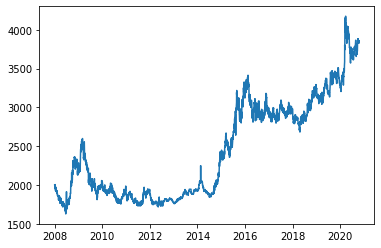

In [20]:
fig = plt.figure()
ax = plt.axes()

y = usdcop['Close']
x = usdcop['Fecha']
ax.plot(x,y)

<AxesSubplot:xlabel='Fecha', ylabel='Close'>

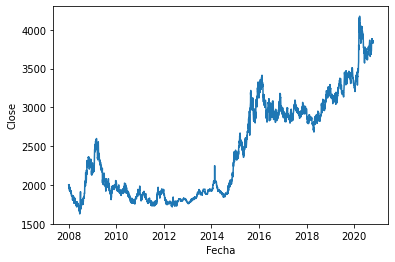

In [21]:
sns.lineplot(data=usdcop, x="Fecha", y="Close")


## Mes

<AxesSubplot:xlabel='Fecha', ylabel='Close'>

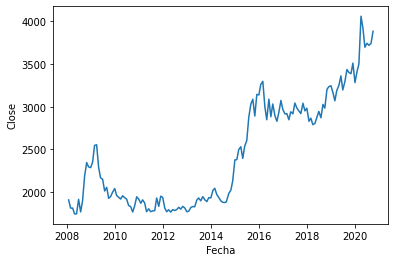

In [22]:
sns.lineplot(data=usdcop_m, x="Fecha", y="Close")


#### Bloxplot mensual

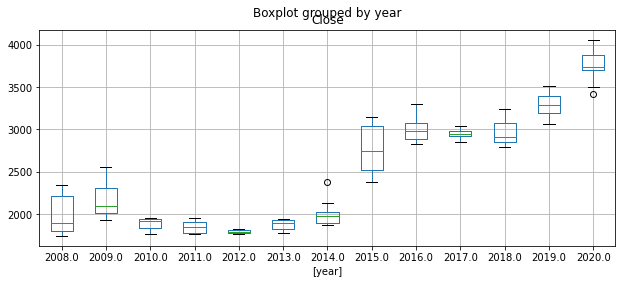

In [24]:
#boxplot_d = usdcop.boxplot(column = ["Close"], by = ['year'],figsize=(10,4))

boxplot_m = usdcop_m.boxplot(column = ["Close"], by = ['year'],figsize=(10,4))


## Año

<AxesSubplot:xlabel='Fecha', ylabel='Close'>

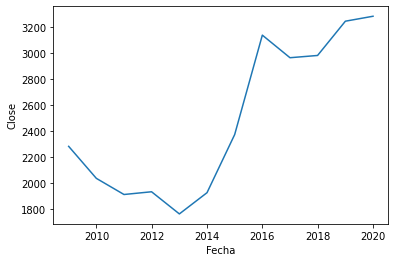

In [25]:
sns.lineplot(data=usdcop_y, x="Fecha", y="Close")

## Gráficos dia, mes, año OIL (WTI)

# Diario

<AxesSubplot:xlabel='Fecha', ylabel='Close'>

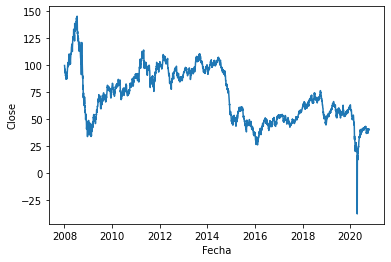

In [26]:
sns.lineplot(data=oil, x="Fecha", y="Close")

# Mes

<AxesSubplot:xlabel='Fecha', ylabel='Close'>

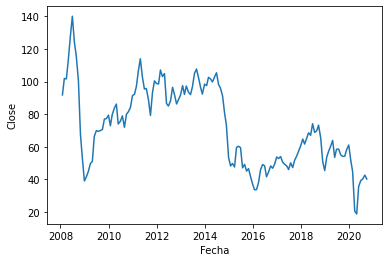

In [27]:
sns.lineplot(data=oil_m, x="Fecha", y="Close")

### Boxplot pretróleo por mes

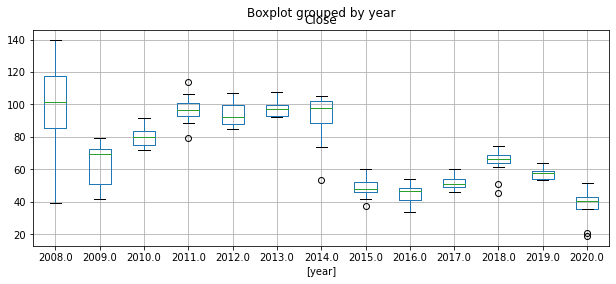

In [28]:
boxplot_m = oil_m.boxplot(column = ["Close"], by = ['year'],figsize=(10,4))


## Año

<AxesSubplot:xlabel='Fecha', ylabel='Close'>

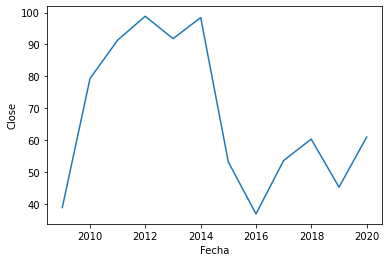

In [29]:
sns.lineplot(data=oil_y, x="Fecha", y="Close")

## Calculo de correlaciones

In [30]:
usdcop['Return']=usdcop.Close.pct_change()
usdcop['Return2']= usdcop.Close.pct_change(periods=2)
usdcop['Return3']= usdcop.Close.pct_change(periods=3)
#usdcop = usdcop.drop(['Log_Return'], axis=1)
oil['Return']= oil.Close.pct_change()
oil['Return2']= oil.Close.pct_change(periods=2)
oil['Return3']= oil.Close.pct_change(periods=3)
oil.head(20)


,Fecha,Close,year,mes,dia,Return,Return2,Return3
Date,,,,,,,,
2008-01-02,2008-01-02,99.620003,2008,1,2,NaN,NaN,NaN
2008-01-03,2008-01-03,99.180000,2008,1,3,-0.004417,NaN,NaN
2008-01-04,2008-01-04,97.910004,2008,1,4,-0.012805,-0.017165,NaN
2008-01-07,2008-01-07,95.089996,2008,1,7,-0.028802,-0.041238,-0.045473
2008-01-08,2008-01-08,96.330002,2008,1,8,0.013040,-0.016137,-0.028736
2008-01-09,2008-01-09,95.669998,2008,1,9,-0.006851,0.006100,-0.022878
2008-01-10,2008-01-10,93.709999,2008,1,10,-0.020487,-0.027198,-0.014513
2008-01-11,2008-01-11,92.690002,2008,1,11,-0.010885,-0.031149,-0.037787
2008-01-14,2008-01-14,94.199997,2008,1,14,0.016291,0.005229,-0.015365


In [31]:
df_unido = pd.merge(usdcop, oil, on = 'Fecha', how='inner',left_index=True, right_index= True,suffixes =('_usdcop','_oil'))
#df_inner = pd.merge(df1, df2, on='id', how='inner')

In [32]:
len(df_unido)

3179

In [33]:
df_unido.head(20)

,Fecha,Close_usdcop,year_usdcop,mes_usdcop,dia_usdcop,Return_usdcop,Return2_usdcop,Return3_usdcop,Close_oil,year_oil,mes_oil,dia_oil,Return_oil,Return2_oil,Return3_oil
Date,,,,,,,,,,,,,,,
2008-01-02,2008-01-02,1979.099976,2008,1,2,-0.010005,NaN,NaN,99.620003,2008,1,2,NaN,NaN,NaN
2008-01-03,2008-01-03,1986.800049,2008,1,3,0.003891,-0.006153,NaN,99.180000,2008,1,3,-0.004417,NaN,NaN
2008-01-04,2008-01-04,1972.099976,2008,1,4,-0.007399,-0.003537,-0.013506,97.910004,2008,1,4,-0.012805,-0.017165,NaN
2008-01-07,2008-01-07,1976.300049,2008,1,7,0.002130,-0.005285,-0.001415,95.089996,2008,1,7,-0.028802,-0.041238,-0.045473
2008-01-08,2008-01-08,1978.800049,2008,1,8,0.001265,0.003397,-0.004027,96.330002,2008,1,8,0.013040,-0.016137,-0.028736
2008-01-09,2008-01-09,2004.000000,2008,1,9,0.012735,0.014016,0.016176,95.669998,2008,1,9,-0.006851,0.006100,-0.022878
2008-01-10,2008-01-10,1952.199951,2008,1,10,-0.025848,-0.013443,-0.012195,93.709999,2008,1,10,-0.020487,-0.027198,-0.014513
2008-01-11,2008-01-11,1964.199951,2008,1,11,0.006147,-0.019860,-0.007378,92.690002,2008,1,11,-0.010885,-0.031149,-0.037787
2008-01-14,2008-01-14,1937.300049,2008,1,14,-0.013695,-0.007632,-0.033283,94.199997,2008,1,14,0.016291,0.005229,-0.015365


In [34]:
df_unido.columns

Index(['Fecha', 'Close_usdcop', 'year_usdcop', 'mes_usdcop', 'dia_usdcop',
       'Return_usdcop', 'Return2_usdcop', 'Return3_usdcop', 'Close_oil',
       'year_oil', 'mes_oil', 'dia_oil', 'Return_oil', 'Return2_oil',
       'Return3_oil'],
      dtype='object')

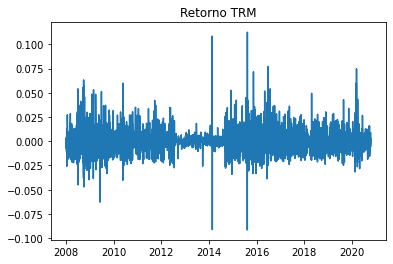

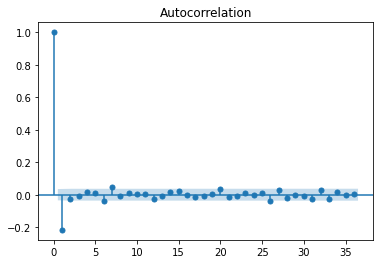

In [59]:
# Import the Python module
from statsmodels.graphics.tsaplots import plot_acf
x = df_unido['Return_usdcop']

# Plot Retornos TRM

plt.plot(x)

plt.title('Retorno TRM')
plt.show()

# ACF

fig = plot_acf(x)

plt.show()

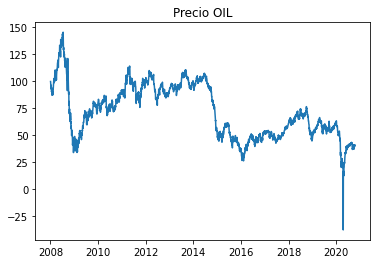

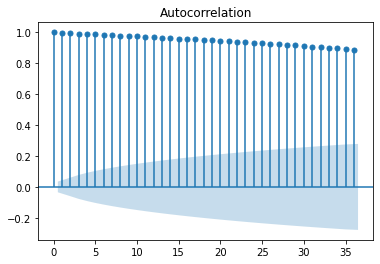

In [61]:
x = df_unido['Close_oil']
#x = x.loc[:'2020-01-31']
# Plot Retorno OIL
plt.plot(x)
plt.title('Precio OIL')
plt.show()

# Generate ACF plot 
plot_acf(x)
plt.show()

In [37]:
df_corr= df_unido[['Close_usdcop','Return_usdcop','Return2_usdcop', 'Return3_usdcop','Close_oil','Return_oil', 'Return2_oil',
       'Return3_oil']].corr()

In [229]:
df_corr_returns = df_unido[['Return_usdcop','Return_oil']].corr()

In [38]:
df_corr

,Close_usdcop,Return_usdcop,Return2_usdcop,Return3_usdcop,Close_oil,Return_oil,Return2_oil,Return3_oil
Close_usdcop,1.000000,0.028787,0.041324,0.051427,-0.831499,-0.033636,-0.030578,-0.036142
Return_usdcop,0.028787,1.000000,0.619091,0.522373,-0.003842,-0.018283,-0.084257,-0.083779
Return2_usdcop,0.041324,0.619091,1.000000,0.726101,-0.009071,-0.025511,-0.107992,-0.151633
Return3_usdcop,0.051427,0.522373,0.726101,1.000000,-0.010730,-0.027959,-0.089694,-0.158138
Close_oil,-0.831499,-0.003842,-0.009071,-0.010730,1.000000,0.079457,0.078030,0.084495
Return_oil,-0.033636,-0.018283,-0.025511,-0.027959,0.079457,1.000000,0.793312,0.727542
Return2_oil,-0.030578,-0.084257,-0.107992,-0.089694,0.078030,0.793312,1.000000,0.758847
Return3_oil,-0.036142,-0.083779,-0.151633,-0.158138,0.084495,0.727542,0.758847,1.000000


* La correlación negativa entre el precio del petróleo y la TRM es alta en niveles -0.83, pero dicho valor puede deberse a la tendencia que se observa en ambas series y la posible presencia de raíz unitaria en ambas series.
* También, como lo muestra el Autocorrelograma (ACF), existe una relación fuerte entre los valores actuales de las series, tanto de la TRM como del petróleo, y sus valores pasados.
* Cuando analizamos la correlación entre los retornos de las series vemos que, aunque se mantiene la correlación negativa, esta cae en valor significativamente.

In [44]:
# Tabla de agrupamiento por año

usdcop_gry = usdcop.groupby(['year']).agg({'Close':['min','max','mean']})
usdcop_gry.columns =['Minimo', 'Maximo', 'Promedio']
usdcop_gry = usdcop_gry.reset_index()





In [45]:
pd.options.display.float_format="{:,.2f}".format
usdcop_gry.head(20)

,year,Minimo,Maximo,Promedio
0,2008,"1,625.70","2,362.80","1,938.44"
1,2009,"1,810.00","2,598.00","2,138.28"
2,2010,"1,755.60","2,023.00","1,888.33"
3,2011,"1,726.70","1,969.30","1,837.83"
4,2012,"1,715.50","1,908.00","1,789.79"
5,2013,"1,758.00","1,949.00","1,866.79"
6,2014,"1,841.00","2,427.00","1,993.51"
7,2015,"2,323.00","3,327.00","2,732.09"
8,2016,"2,806.00","3,414.00","3,026.51"
9,2017,"2,796.70","3,094.25","2,937.58"
